In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset

city_and_ride_df = pd.merge(ride_data_df, city_data_df, on = 'city')
city_and_ride_df = city_and_ride_df.drop_duplicates('city')
city_and_ride_df = city_and_ride_df.reset_index(drop='true')

# Display the data table for preview

city_and_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

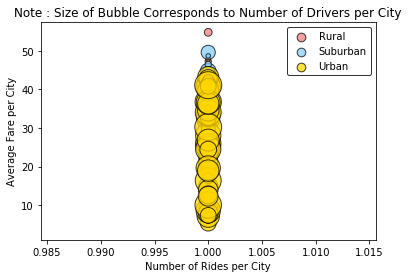

In [4]:
# Obtain the x and y coordinates for each of the three city types

city_group = city_and_ride_df.groupby('city')

avg_fare = city_group['fare'].mean()

total_rides = city_group['ride_id'].count()

number_of_drivers = city_group['driver_count'].mean()

city_type = city_data_df.set_index('city')['type']

plot_df = pd.DataFrame({
    "Total Number of Rides":total_rides,
    "Average Fare":avg_fare,
    "Number of Drivers":number_of_drivers,
    "City Type":city_type
})

plot_df.sort_values('Number of Drivers', ascending = False)

# Build the scatter plots for each city types
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

rural = plot_df[plot_df['City Type'] == 'Rural']
suburban = plot_df[plot_df['City Type'] == 'Suburban']
urban = plot_df[plot_df['City Type'] == 'Urban']

plt.scatter(rural['Total Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], 
            edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Total Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], 
            edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Total Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'],
            edgecolor = 'black', label = 'Urban', alpha = .75)

# Incorporate the other graph properties
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

# Create a legend

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()